<a href="https://colab.research.google.com/github/avinashbisht1410/supervised-learning-w-python/blob/master/Multi_linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Example 2: Multiple Linear Regression for Housing Dataset

We are working on the house price dataset. The target variable is the prediction of house prices and there are some independent variables.

Step 1: Import all the required libraries first.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

Step 2: Import the data which is in the form of .csv file. Then check the first few rows.

In [5]:
house_mlr = pd.read_csv('House_data.csv')
house_mlr.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


We have 21 variables in this dataset.

Step 3: Next let’s explore the dataset we have. This is done using the house_mlr.info() command.

In [6]:
house_mlr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

By analyzing the output we can see that out of the 21 variables, there are a few float variables, some object and some integers. We will be treating these categorical variables to integer variables.

Step 4: house_mlr.describe() command will give the details about all the numeric variables.

In [7]:
house_mlr.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Here we can see the range for all the numeric variables: the mean, standard deviation, the values at the 25th percentile, 50th percentile, and 75th percentile. The minimum and maximum values are also shown.

A very good way to visualize the variables is using a box-and-whisker plot using the following code.

{'whiskers': [<matplotlib.lines.Line2D at 0x7a6f97fb5e10>,
 'caps': [<matplotlib.lines.Line2D at 0x7a6f97fb6350>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a6f97fb4880>],
 'medians': [<matplotlib.lines.Line2D at 0x7a6f97fb6890>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a6f97fb6b30>],
 'means': []}

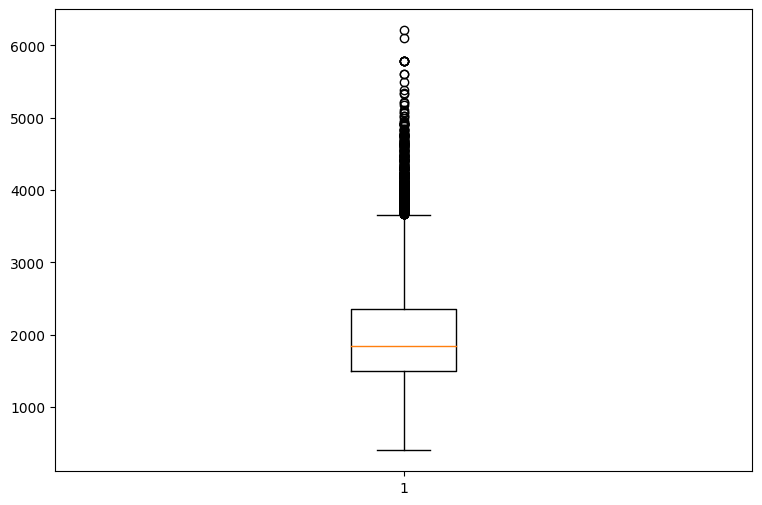

In [8]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.boxplot(house_mlr['sqft_living15'])

The plot shows that there are a few outliers. In this case, we are not treating the outliers. In later chapters, we shall examine the best practices to deal with outliers.

Step 5: Now we are going to check for the correlations between the variables. This will be done using a correlation matrix which is developed using the following code:

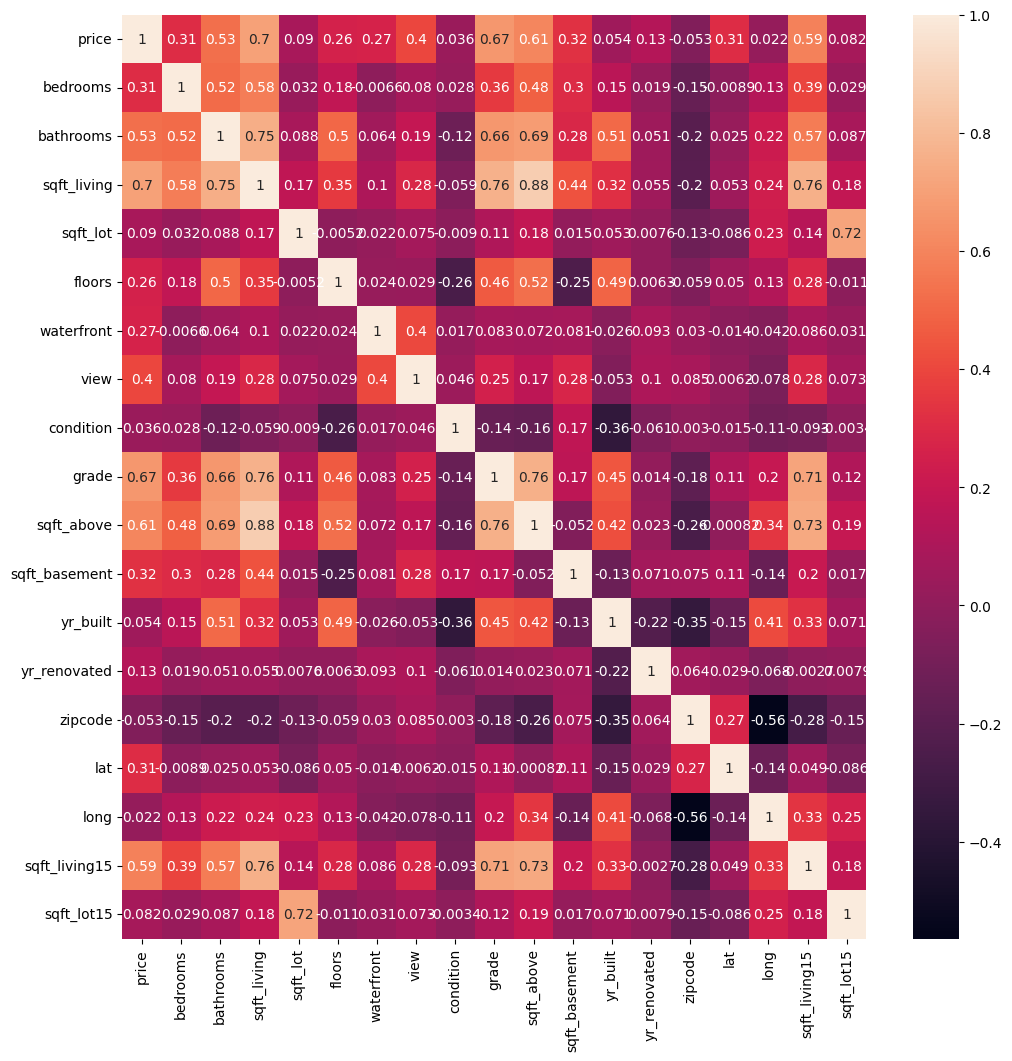

In [9]:
house_mlr.drop(['id', 'date'], axis = 1, inplace = True)
fig, ax = plt.subplots(figsize = (12,12))
ax = sns.heatmap(house_mlr.corr(),annot = True)

The analysis of the correlation matrix shows that there is some correlation between a few variables. For example, between sqft_above and sqft_living there is a correlation of 0.88. And that is quite expected.

For this first simple example, we are not treating the correlated variables.

Step 6: Now we will clean the data a little. There are a few null values present in the dataset. We are dropping those null values now. We are examining the concepts of missing value treatment in Chapter 5.

In [10]:
house_mlr.isnull().any()
house_mlr ['basement'] = (house_mlr ['sqft_basement'] > 0).astype(int)
house_mlr ['renovated'] = (house_mlr ['yr_renovated'] > 0).astype(int)
to_drop = ['sqft_basement', 'yr_renovated']
house_mlr.drop(to_drop, axis = 1, inplace = True)
house_mlr.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,basement,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639,1,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,98028,47.7379,-122.233,2720,8062,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000,1,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503,0,0


Step 7: The categorical variables are converted to numeric ones using one-hot encoding.

One-hot encoding converts categorical variables to numeric ones. Simply put, it adds new columns to the dataset with 0 or assigned depending on the value of the categorical variable, as shown in the following:

../images/499122_1_En_2_Chapter/499122_1_En_2_Fign_HTML.jpg

In [11]:
categorical_variables = ['waterfront', 'view', 'condition', 'grade', 'floors','zipcode']
house_mlr = pd.get_dummies(house_mlr, columns = categorical_variables, drop_first=True)
house_mlr.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,lat,long,sqft_living15,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.00,1180,5650,1180,1955,47.5112,-122.257,1340,...,False,False,False,False,False,False,True,False,False,False
1,538000.0,3,2.25,2570,7242,2170,1951,47.7210,-122.319,1690,...,False,False,False,False,False,False,False,False,False,False
2,180000.0,2,1.00,770,10000,770,1933,47.7379,-122.233,2720,...,False,False,False,False,False,False,False,False,False,False
3,604000.0,4,3.00,1960,5000,1050,1965,47.5208,-122.393,1360,...,False,False,False,False,False,False,False,False,False,False
4,510000.0,3,2.00,1680,8080,1680,1987,47.6168,-122.045,1800,...,False,False,False,False,False,False,False,False,False,False


Step 8: We will now split the data into train and test and then fit the model. Test size is 25% of the data.

In [12]:
X = house_mlr.iloc[:, 1:].values
y = house_mlr.iloc[:, 0].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
from sklearn.linear_model import LinearRegression
multiple_regression = LinearRegression()
multiple_regression.fit(X_train, y_train)

LinearRegression()

Step 9: Predict the test set results.

In [13]:
y_pred = multiple_regression.predict(X_test)

Step 10: We will now check the accuracy of our model.

In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - float(len(y)-1)/(len(y)-len(multiple_regression.coef_)-1)*(1 - r2)
rmse, r2, adj_r2

(147274.9852260876, 0.8366403242152785, 0.8358351477234538)

The steps used in this example can be extended to any example where we want to predict a continuous variable. In this problem, we have predicted the value of a continuous variable but we have not selected the significant variables from the list of available variables. Significant variables are the ones which are more important than other independent variables in making the predictions. There are multiple ways to shortlist the variables. We will discuss one of them using the ensemble technique in the next section. The popular methodology of using p-value is discussed in Chapter 3.

With this, we have discussed the concepts and implementation using linear regression. So far, we have assumed that the relationship between dependent and independent variables is linear. But what if this relation is not linear? That is our next topic: nonlinear regression.